# 2019년 사망 교통사고 분석

1.  어느 지역이 가장 많은 사망 교통사고가 발생 했었나
2.  어느 시간대에 가장 많은 사망 교통사고가 발생 했었나
3.  교통사고 정보를 지도에 표시하여 시각화



## 패키지 설미 및 라이브러리 임포트

In [ ]:
!pip install koreanize-matplotlib

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as pit
import koreanize_matplotlib

import folium


## 데이터 준비하기

1.   데이터 다운로드:https://www.data.go.kr/data/15070340/fileData.do
2.   도로교통공단_ 교통사고 정보_2019.csv



In [ ]:
df = pd.read_csv("/content/도로교통공단_교통사고 정보_2019.csv", encoding =" EUC-KR" )
df

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2019,2019010100,야,화,1,0,0,0,0,부산,...,기타,중앙선 침범,교차로,교차로내,승용차,보행자,1150507.0,1685987.0,129.152465,35.157884
1,2019,2019010103,야,화,1,0,0,0,0,경기,...,정면충돌,중앙선 침범,단일로,기타단일로,승용차,승용차,943018.0,1921233.0,126.857149,37.288292
2,2019,2019010116,주,화,1,0,0,0,0,경북,...,측면충돌,안전운전 의무 불이행,교차로,교차로부근,승용차,사륜오토바이(ATV),1100414.0,1739893.0,128.609230,35.650108
3,2019,2019010119,야,화,1,0,0,0,0,대전,...,횡단중,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,989194.0,1817621.0,127.379560,36.355946
4,2019,2019010121,야,화,1,0,0,0,0,경북,...,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,1127700.0,1767912.0,128.915041,35.899506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,2019,2019123105,야,화,1,0,0,0,0,서울,...,차도통행중,안전운전 의무 불이행,교차로,교차로부근,화물차,보행자,964440.0,1943029.0,127.097769,37.485819
3229,2019,2019123108,주,화,1,1,0,1,0,강원,...,추돌,안전운전 의무 불이행,교차로,교차로내,승용차,건설기계,1097892.0,2009288.0,128.616149,38.078411
3230,2019,2019123112,주,화,1,1,0,0,1,경북,...,공작물충돌,안전운전 의무 불이행,교차로,교차로내,승용차,없음,1082569.9,1777238.5,128.415998,35.988434
3231,2019,2019123112,주,화,1,1,0,1,0,울산,...,횡단중,기타,교차로,교차로부근,승용차,보행자,1157722.0,1731868.0,129.240504,35.570292


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   발생년         3233 non-null   int64  
 1   발생년월일시      3233 non-null   int64  
 2   주야          3233 non-null   object 
 3   요일          3233 non-null   object 
 4   사망자수        3233 non-null   int64  
 5   부상자수        3233 non-null   int64  
 6   중상자수        3233 non-null   int64  
 7   경상자수        3233 non-null   int64  
 8   부상신고자수      3233 non-null   int64  
 9   발생지시도       3233 non-null   object 
 10  발생지시군구      3233 non-null   object 
 11  사고유형_대분류    3233 non-null   object 
 12  사고유형_중분류    3233 non-null   object 
 13  사고유형        3233 non-null   object 
 14  가해자법규위반     3233 non-null   object 
 15  도로형태_대분류    3233 non-null   object 
 16  도로형태        3233 non-null   object 
 17  가해자_당사자종별   3233 non-null   object 
 18  피해자_당사자종별   3233 non-null   object 
 19  발생위치X_UTMK  3233 non-null  

## 사망교통사고 데이터 전처리

### 발생연월일시 컬럼에서 시간 컬럼 팡생 변수 만들기

In [ ]:
df  # 슬라이싱만 가능

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2019,2019010100,야,화,1,0,0,0,0,부산,...,기타,중앙선 침범,교차로,교차로내,승용차,보행자,1150507.0,1685987.0,129.152465,35.157884
1,2019,2019010103,야,화,1,0,0,0,0,경기,...,정면충돌,중앙선 침범,단일로,기타단일로,승용차,승용차,943018.0,1921233.0,126.857149,37.288292
2,2019,2019010116,주,화,1,0,0,0,0,경북,...,측면충돌,안전운전 의무 불이행,교차로,교차로부근,승용차,사륜오토바이(ATV),1100414.0,1739893.0,128.609230,35.650108
3,2019,2019010119,야,화,1,0,0,0,0,대전,...,횡단중,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,989194.0,1817621.0,127.379560,36.355946
4,2019,2019010121,야,화,1,0,0,0,0,경북,...,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,1127700.0,1767912.0,128.915041,35.899506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,2019,2019123105,야,화,1,0,0,0,0,서울,...,차도통행중,안전운전 의무 불이행,교차로,교차로부근,화물차,보행자,964440.0,1943029.0,127.097769,37.485819
3229,2019,2019123108,주,화,1,1,0,1,0,강원,...,추돌,안전운전 의무 불이행,교차로,교차로내,승용차,건설기계,1097892.0,2009288.0,128.616149,38.078411
3230,2019,2019123112,주,화,1,1,0,0,1,경북,...,공작물충돌,안전운전 의무 불이행,교차로,교차로내,승용차,없음,1082569.9,1777238.5,128.415998,35.988434
3231,2019,2019123112,주,화,1,1,0,1,0,울산,...,횡단중,기타,교차로,교차로부근,승용차,보행자,1157722.0,1731868.0,129.240504,35.570292


In [ ]:
# 사망 교통사고가 가장 많이 발생하는 시간은?
# 발생년월일시 -> 뒤에 두자리(시간:00-23)  -> 파생변수로 따로 분리
# 2019010100-> 00-> 분리할 수 있는 키워드가 없음 -> 문자열 슬라이싱


#1. 자료형->문자형으로 형변환/발생년월일시 칼럼명은 연속적인 숫자(int) -> 문자열 슬라이딩 할 수 있는 string으로 형변환
#df = df.astype({'발생년월일시 ':'string'})
df['발생년월일시'] = df['발생년월일시'].astype(str)
df.info

<bound method DataFrame.info of        발생년      발생년월일시 주야 요일  사망자수  부상자수  중상자수  경상자수  부상신고자수 발생지시도  ...  \
0     2019  2019010100  야  화     1     0     0     0       0    부산  ...   
1     2019  2019010103  야  화     1     0     0     0       0    경기  ...   
2     2019  2019010116  주  화     1     0     0     0       0    경북  ...   
3     2019  2019010119  야  화     1     0     0     0       0    대전  ...   
4     2019  2019010121  야  화     1     0     0     0       0    경북  ...   
...    ...         ... .. ..   ...   ...   ...   ...     ...   ...  ...   
3228  2019  2019123105  야  화     1     0     0     0       0    서울  ...   
3229  2019  2019123108  주  화     1     1     0     1       0    강원  ...   
3230  2019  2019123112  주  화     1     1     0     0       1    경북  ...   
3231  2019  2019123112  주  화     1     1     0     1       0    울산  ...   
3232  2019  2019123116  주  화     1     0     0     0       0    경남  ...   

       사고유형      가해자법규위반 도로형태_대분류   도로형태 가해자_당사자종별    피해자_당사자종별 발생위

In [ ]:
df['발생시간'] = df['발생년월일시'].str[0:]

In [ ]:
# 3) 발생시간을 숫자 데이터타입으로 변형

#df = df.astype({'발생년월일시 ':'string'})
#df.info

### 4) 발생년월일시 컬럼에서 발생년월일시 컬럼 파생 변수 만들기

In [ ]:
# 발새년월일시 (string) -> 발생년월일시(datatype) 으로 변경
# 2019010100 ->20190101(년월일) 슬라이싱 -> yyyy mm dd(날짜 형태로 변경)-> 2019-01-01
df['발생년월일'] = pd.to_datetime(df['발생년월일시'].str[:8], format='%Y%m%d', errors='raise')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   발생년         3233 non-null   int64         
 1   발생년월일시      3233 non-null   object        
 2   주야          3233 non-null   object        
 3   요일          3233 non-null   object        
 4   사망자수        3233 non-null   int64         
 5   부상자수        3233 non-null   int64         
 6   중상자수        3233 non-null   int64         
 7   경상자수        3233 non-null   int64         
 8   부상신고자수      3233 non-null   int64         
 9   발생지시도       3233 non-null   object        
 10  발생지시군구      3233 non-null   object        
 11  사고유형_대분류    3233 non-null   object        
 12  사고유형_중분류    3233 non-null   object        
 13  사고유형        3233 non-null   object        
 14  가해자법규위반     3233 non-null   object        
 15  도로형태_대분류    3233 non-null   object        
 16  도로형태        3233 non-nul

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생시간,발생년월일
0,2019,2019010100,야,화,1,0,0,0,0,부산,...,교차로,교차로내,승용차,보행자,1150507.0,1685987.0,129.152465,35.157884,2019010100,2019-01-01
1,2019,2019010103,야,화,1,0,0,0,0,경기,...,단일로,기타단일로,승용차,승용차,943018.0,1921233.0,126.857149,37.288292,2019010103,2019-01-01
2,2019,2019010116,주,화,1,0,0,0,0,경북,...,교차로,교차로부근,승용차,사륜오토바이(ATV),1100414.0,1739893.0,128.609230,35.650108,2019010116,2019-01-01
3,2019,2019010119,야,화,1,0,0,0,0,대전,...,교차로,교차로부근,승용차,보행자,989194.0,1817621.0,127.379560,36.355946,2019010119,2019-01-01
4,2019,2019010121,야,화,1,0,0,0,0,경북,...,단일로,기타단일로,승용차,보행자,1127700.0,1767912.0,128.915041,35.899506,2019010121,2019-01-01


### 필요없는 칼럼 삭제 및 컬럼 정렬

In [ ]:
#) 1. 필요없는 컬럼 삭제
del df['발생년월일시']
df. head()

,발생년,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,...,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,발생시간,발생년월일
0,2019,야,화,1,0,0,0,0,부산,해운대구,...,교차로,교차로내,승용차,보행자,1150507.0,1685987.0,129.152465,35.157884,2019010100,2019-01-01
1,2019,야,화,1,0,0,0,0,경기,안산시,...,단일로,기타단일로,승용차,승용차,943018.0,1921233.0,126.857149,37.288292,2019010103,2019-01-01
2,2019,주,화,1,0,0,0,0,경북,청도군,...,교차로,교차로부근,승용차,사륜오토바이(ATV),1100414.0,1739893.0,128.609230,35.650108,2019010116,2019-01-01
3,2019,야,화,1,0,0,0,0,대전,서구,...,교차로,교차로부근,승용차,보행자,989194.0,1817621.0,127.379560,36.355946,2019010119,2019-01-01
4,2019,야,화,1,0,0,0,0,경북,영천시,...,단일로,기타단일로,승용차,보행자,1127700.0,1767912.0,128.915041,35.899506,2019010121,2019-01-01


In [ ]:
#2) 컬럼 순서 정리 발생년, 발생월일, 발생시간,주/야 ~~~
# 뒤에 2개만 추출
col1 = df.columns[-2: ].to_list()
col1.reverse()
col2 = df.columns[1: -2].to_list()

col_list = col1+col2
col_list.insert(0, '발생년')

#2원하는 컬럼 순서로 추출 후 다시 담기
df = df[col_list]



#2-1) 컬럼명을 리스트로 만들자.

In [ ]:
df.columns

Index(['발생년', '발생년월일', '발생시간', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수',
       '부상신고자수', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

정제된 데이터셋 저장하기

In [ ]:
df.to_csv('2019년 지역별 교통사고 데이터 ', encoding = 'utf-8-sig', index=False)

## 데이터 시각화

### 날짜별/시간별 교통사고 현황보기

In [ ]:
fig = px.scatter(df, x='발생년월일', y='발생시간', color='발생지시도', hover_data=['발생시간'])

fig.show()

### 시간대별 교통사고 사망자 현황

In [ ]:
fig = px.bar(df, x='사망자수', y='발생시간', orientation='h')

fig.show()

In [ ]:
fig = px.bar(df, x='발생시간', y='사망자수')

fig.show()

### 시도별 교통사고 사망자 현황

In [ ]:
fig = px.bar(df, x='발생년월일', y='발생지시도', hover_data=['발생시간'], )

fig.show()

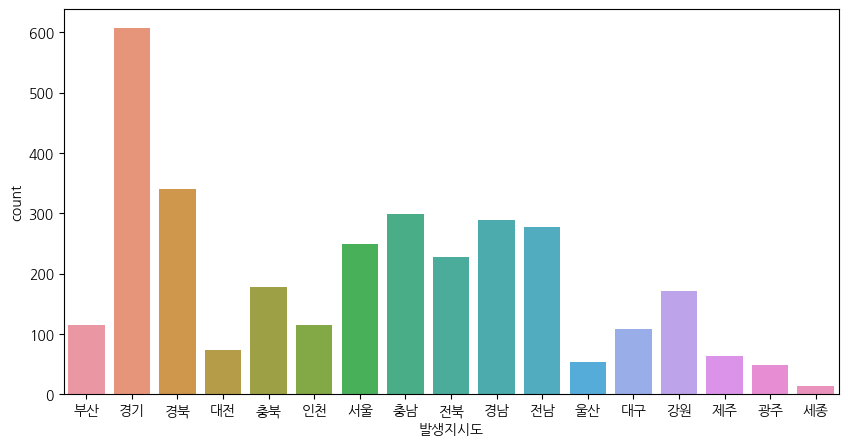

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns                             # import 선언 없었음

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='발생지시도')
plt.show()

### 요일별 교통사고 현황

In [ ]:
fig = px.bar(df, x='사망자수', y='요일', orientation='h')

fig.show()


# 사망자수

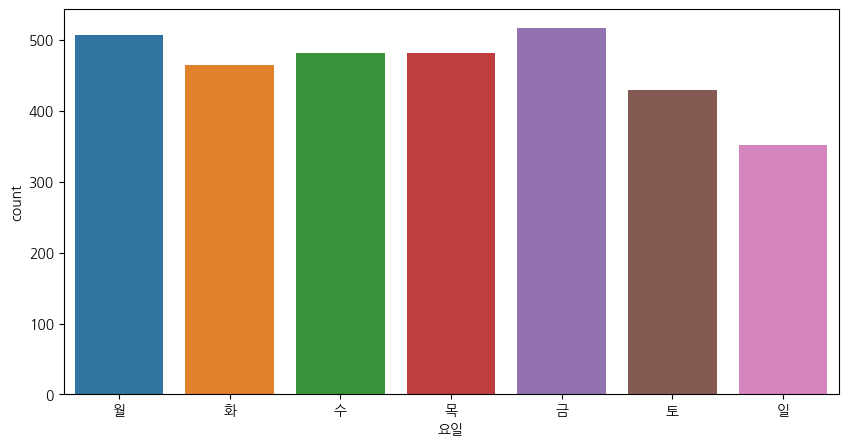

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='요일', order = ['월','화','수','목','금','토','일'])
plt.show()

# 발생기준

### 사고 유형별 교통사고 현황

In [ ]:
fig = px.bar(df, x='사망자수', y='사고유형', orientation='h')

fig.show()


In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='사고유형')
plt.show()

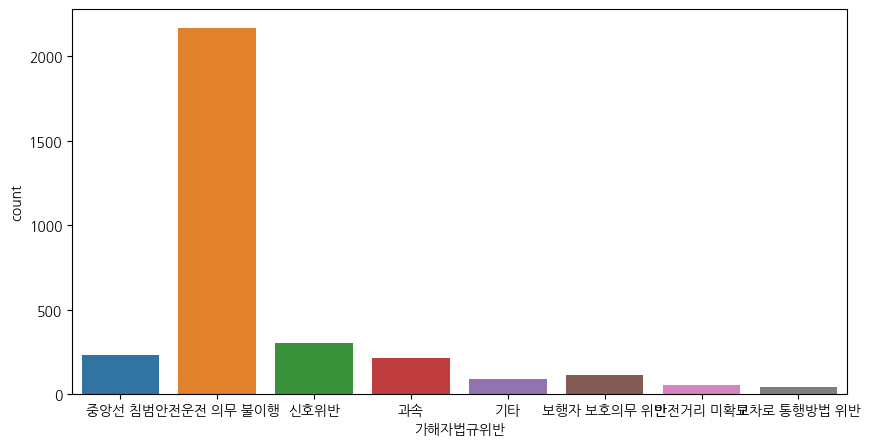

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='가해자법규위반')
plt.show()

## 대전광역시 교통사고 발생 데이터분석

### 데이터 준비하기


In [ ]:
dj_df = df[df['발생지시도'] == '대전']
dj_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 3 to 3124
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   발생년         74 non-null     int64         
 1   발생년월일       74 non-null     datetime64[ns]
 2   발생시간        74 non-null     object        
 3   주야          74 non-null     object        
 4   요일          74 non-null     object        
 5   사망자수        74 non-null     int64         
 6   부상자수        74 non-null     int64         
 7   중상자수        74 non-null     int64         
 8   경상자수        74 non-null     int64         
 9   부상신고자수      74 non-null     int64         
 10  발생지시도       74 non-null     object        
 11  발생지시군구      74 non-null     object        
 12  사고유형_대분류    74 non-null     object        
 13  사고유형_중분류    74 non-null     object        
 14  사고유형        74 non-null     object        
 15  가해자법규위반     74 non-null     object        
 16  도로형태_대분류    74 non-null   

### 대전의 교통사고 발생시간별 사망자 현황

In [ ]:
fig = px.bar(dj_df, x='사망자수', y='발생시간', orientation='h')

fig.show()

### 지역구별 교통사고 사망자 현황

In [ ]:
fig = px.bar(dj_df, x='사망자수', y='발생지시군구', orientation='h')

fig.show()

###대전 요일별 사망자수

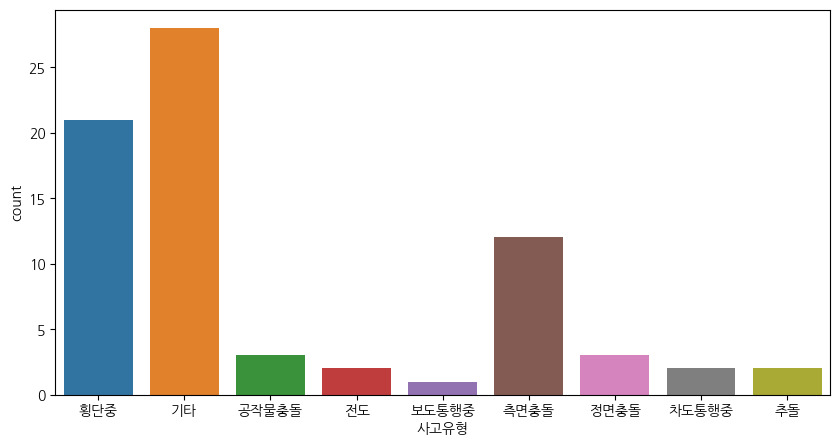

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(dj_df, x='사고유형')
plt.show()

### 사고유형별 교통사고 사망자 현황

In [ ]:
fig = px.bar(dj_df, x='사망자수', y='사고유형', orientation='h')

fig.show()

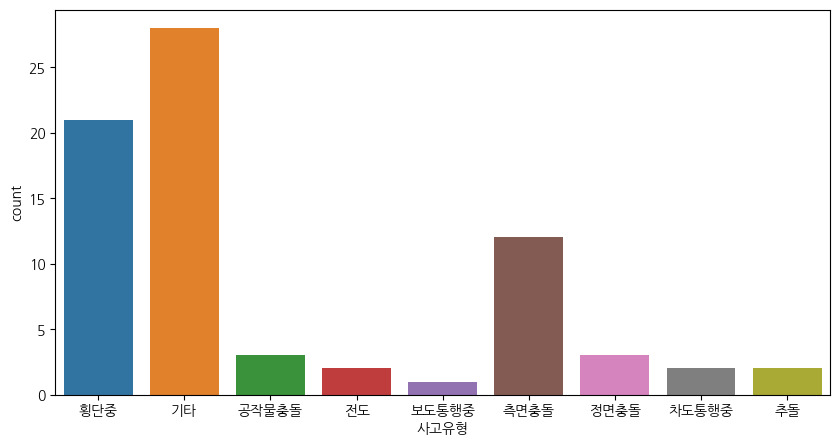

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(dj_df, x='사고유형')
plt.show()

## 지도를 활용해서 교통사고 분석

### 기본 지도 준비하기

In [ ]:
import folium

map = folium.Map(location=[36.3504119,127.3845475]) # 경도 /위도 순으로 .
map

### 대전광역시 사망교통사고 위치 지도 시각화

#### 사망자 수에 따른 마커 크기로 시각화

In [ ]:
# 사망사고 위치에circleMaker 표출
# CircleMaker 사이즈 = 사망자수 +  부상자수(중상자 경상자 부상신고자)
# CircleMaker 클릭하면, popup 으로 사고유형 나타나도록 구현


# CircleMaker 사이즈(radius)  = 실수형 데이터만 취급 / 정수형으로는 안 그려짐. r *3.14
# 사망자수 부상자수 컬럼 데이터타입 -> 실수


dj_df = dj_df.astype({'사망자수': float, '부상자수': float})
dj_df.head()

,발생년,발생년월일,발생시간,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
3,2019,2019-01-01,2019010119,야,화,1.0,0.0,0,0,0,...,횡단중,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,989194.0,1817621.0,127.379560,36.355946
43,2019,2019-01-07,2019010718,야,월,1.0,0.0,0,0,0,...,횡단중,안전운전 의무 불이행,교차로,교차로내,승합차,보행자,991972.0,1812502.0,127.410575,36.309824
105,2019,2019-01-14,2019011407,주,월,1.0,0.0,0,0,0,...,기타,신호위반,교차로,교차로부근,화물차,자전거,990556.0,1826775.0,127.394629,36.438487
114,2019,2019-01-15,2019011504,야,화,1.0,0.0,0,0,0,...,공작물충돌,안전운전 의무 불이행,단일로,교량위,승용차,없음,994663.0,1814573.0,127.440536,36.328513
208,2019,2019-01-24,2019012421,야,목,1.0,0.0,0,0,0,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,992948.0,1819982.0,127.421379,36.377267


## 사망자수: 부상자수에 따른 ,CircleMaker 지도에 표출

In [ ]:
import folium

# 1. 지도 준비
map = folium.Map(location=[36.3504119, 127.3845475])

# 2) CircleMaker 지도에 표출 -> for 문을 이용해서 dj_df 데이터가 있을 때까지 CircleMarker를 지도에 추가
for n in dj_df.index:
    # 써클마커 사이즈
    cnt = dj_df['사망자수'][n] + dj_df['부상자수'][n]
    # 위도 경도 추출
    lat = dj_df['위도'][n]
    lng = dj_df['경도'][n]

    # CircleMarker를 지도에 추가
    folium.CircleMarker([lat, lng], radius=cnt * 10, popup=dj_df['사고유형'][n],
                        color='#F70000', fill_color='#F70000').add_to(map)

map

#### 대전광역시 사망교통사고 지도 시각화 저장하기

In [ ]:
map.save('2019_대전교통사고현황. html')

In [75]:
import webbrowser

file_path = '2019_대전교통사고현황. html'

webbrowser.open(file_path)

False

In [ ]:
df['발생지시도'].unique()
sns.countplot(data = df, x = '발생지시도')
plt.show()

In [68]:
location_list = df['발생지시도'].unique()
location_list.sort()

In [70]:
location_list

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [71]:
r(df, x = '사망자수',y = '발생지시도', orientation = 'h', category_orders = {'발생지시도': location_list})

NameError: ignored

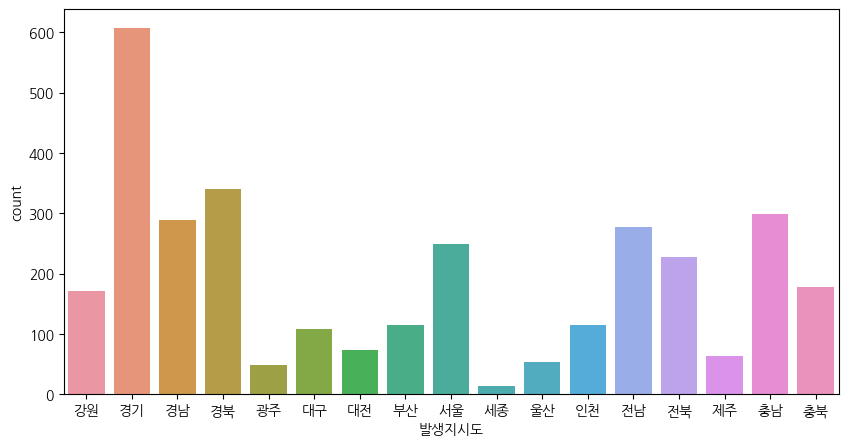

In [72]:
plt.figure(figsize=(10, 5))
sns.countplot(data = df, x='발생지시도',order = location_list)
plt.show()